## Recommender system to predict a book that a user is most likely to buy next 

In [1]:
# Importing libraries necessary for this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
# Pretty display for notebooks
%matplotlib inline
import os

In [2]:
# Loading data files
books = pd.read_csv("Books.csv", sep=',', error_bad_lines=False, encoding='latin-1')
users = pd.read_csv("Users.csv", sep=',', error_bad_lines=False, encoding='latin-1')
events = pd.read_csv("UserEvents.csv", sep=',', error_bad_lines=False, encoding='latin-1')

### Data Exploration

In [4]:
#Display first 5 rows of each file
books.head()

,Unnamed: 0,bookISBN,bookName,author,yearOfPublication,publisher,urlId
0,58005,0773730982,"Stretch, Swallow &amp; Stare",Veronika Martenova Charles,1999,Stoddart Kids,8040.0
1,158211,0916620867,The Two Faces of Religion: A Psychiatrists View,N.S. Xavier,1987,Portals Pr,46584.0
2,127812,0380978598,Roma Eterna,Robert Silverberg,2003,Eos,39681.0
3,47598,0802727719,For Everything a Season: Simple Musings on Liv...,Philip Gulley,2001,Walker Large Print,29478.0
4,131723,0446604178,"Mountain, Get Out of My Way: Life Lessons and ...",Montel Williams,1997,Warner Books (Mm),104573.0


In [5]:
users.head()

,Unnamed: 0,user,location,age
0,177121,177122.0,"winter park, florida, usa",50.0
1,174021,174022.0,"fairview park, ohio, usa",NaN
2,179441,179442.0,"farmville, north carolina, usa",45.0
3,44391,44392.0,"weston, florida, usa",65.0
4,89250,89251.0,"duesseldorf, n/a, germany",NaN


In [6]:
events.head()

,Unnamed: 0,user,bookId,impression
0,523113,126736,0843946806,dislike
1,861298,208406,0345353145,like
2,37104,8890,2020213508,add to cart
3,328497,78553,0451402383,add to cart
4,121368,27875,0307129659,add to cart


In [7]:
#Cheking data shapes
print(users.shape)
print(books.shape)
print(events.shape)

(100000, 4)
(150000, 7)
(400000, 4)


Now, let's look at the books dataset in detail. Check for incorrect entries in the relevant columns. 

In [8]:
books.yearOfPublication.unique()

array(['1999', '1987', '2003', '2001', '1997', '1994', '1998', '1976',
       '1986', '2004', '1978', '1995', '2002', '1983', '1981', '1992',
       '2000', '1984', '1993', '1996', '1991', '1985', '1982', '1990',
       '0', '1975', '1965', '1989', '1988', '1980', '1977', '1973',
       '1979', '1968', '1972', '1969', '1970', '1974', '1955', '1959',
       '1964', '1967', '1962', '1957', '1963', '1966', '1960', '2005',
       '1954', '1961', '1951', '1971', '1958', '1956', '1920', '1948',
       '1901', '2021', '1929', '1953', '1940', '1923', '1930', '1942',
       '1952', '1900', '2006', '1950', '1947', '1926', '1944', '1376',
       '1931', '1941', '2038', '1921', '2030', '1925', '1937', '1946',
       '1949', '1911', '1939', '2011', '1933', '2008', '2050', '1910',
       '1922', '1934', '2010', '2024', '1919', '1936', '1927', '1938',
       '1943', '1928', '2012', '1932', '1945', 'DK Publishing Inc',
       '2020', '1917', '2037', '1914', '1906'], dtype=object)

It looks like there are entries showing year 0 and DK Publishing Inc that don't look right.

In [9]:
#making this setting to display full text in columns
pd.set_option('display.max_colwidth', -1)
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,Unnamed: 0,bookISBN,bookName,author,yearOfPublication,publisher,urlId
98597,209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,111.0
132137,221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,126708.0


It can be seen that the author name is added to book name and has resulted in incorrect entries for the next columns.

In [10]:
#ISBN '078946697X'
books.loc[books.bookISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.bookISBN == '078946697X','author'] = "Michael Teitelbaum"
books.loc[books.bookISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.bookISBN == '078946697X','bookName'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [11]:
#ISBN '0789466953'
books.loc[books.bookISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.bookISBN == '0789466953','author'] = "James Buckley"
books.loc[books.bookISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.bookISBN == '0789466953','bookName'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

Let's check now

In [12]:
books.loc[(books.bookISBN == '0789466953') | (books.bookISBN == '078946697X'),:]

,Unnamed: 0,bookISBN,bookName,author,yearOfPublication,publisher,urlId
98597,209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,111.0
132137,221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,126708.0


In [13]:
#Correcting the dtypes of yearOfPublication
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')
print(sorted(books['yearOfPublication'].unique()))

[0, 1376, 1900, 1901, 1906, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2030, 2037, 2038, 2050]


So, the year 0 and >2018 should be invalid and so let's replace those. I am replacing those with the mean value of this column.

In [14]:
books.loc[(books.yearOfPublication == 1376)]

,Unnamed: 0,bookISBN,bookName,author,yearOfPublication,publisher,urlId
20969,253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,55181.0


In [15]:
books.loc[(books.yearOfPublication == 0) | (books.yearOfPublication > 2018) ,'yearOfPublication'] = np.NAN
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

In [16]:
books.yearOfPublication.isnull().sum()

0

Now let's look at the user dataset.

In [17]:
users.dtypes

Unnamed: 0    int64  
user          float64
location      object 
age           float64
dtype: object

In [18]:
#replacing NaNs with 0
users.user = users.user.fillna(0)

In [19]:
#Let's convert user id from float to integer
users.user = users.user.astype(np.int64)

In [20]:
print(sorted(users.age.unique()))

[1.0, 50.0, nan, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 90.0, 91.0, 92.0, 93.0, 94.0, 96.0, 97.0, 99.0, 100.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 111.0, 113.0, 114.0, 116.0, 118.0, 123.0, 124.0, 141.0, 143.0, 147.0, 148.0, 151.0, 152.0, 162.0, 189.0, 200.0, 204.0, 208.0, 209.0, 210.0, 219.0, 230.0]


There are some NaNs and some very large numbers for ages. To get an idea about the age distribution of users who buy books online, I think it is reasonable to consider ages between 5 and 95 and I will replace those with NaNs first and then to the mean age. 

In [21]:
users.loc[(users.age < 5) | (users.age > 90), 'age'] = np.nan
users.age = users.age.fillna(users.age.mean())
#Let's set the data type as int
users.age = users.age.astype(np.int32)


Let's check now

In [23]:
print (sorted(users.age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90]


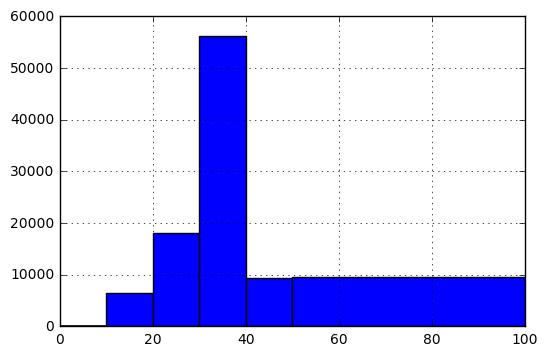

In [24]:
#Let's see the distribution and if it makes sense
users.age.hist(bins=[0,10,20,30,40,50,100])
plt.show()


It makes sense that most active users are between ages 30 to 40 that have either bought or broswed the books online.

Now let's look at the events dataset. 

In [25]:
len(events.bookId.unique())

175785

In [26]:
sorted(events.bookId.unique())

[' 0330299891',
 ' 0375404120',
 ' 9022906116',
 '#6612432',
 "'9607092910'",
 ')416195113',
 ')452273056',
 ')553267833',
 '/8741060773',
 '0 00 655241 2',
 '0 09 944678 2',
 '0 14 02.9640',
 '0 297 64548 X',
 '0 330 10597 3',
 '0 440 20615 4',
 '0 671 74251 5',
 '0 907 062 008',
 '0*449002632',
 '0*553*072412',
 '0*708880258',
 '0+399139745',
 '0-517-18725-6',
 '0.15.602732.1',
 '0.330241664',
 '0.380.44099.7',
 '0.380.50377.8',
 '0.473.087979',
 '0/330/25864/8',
 '00000000',
 '000000000',
 '0000000000',
 '00000000000',
 '000000000000',
 '0000000000000',
 '0000000000090',
 '0000000010',
 '0000000016964',
 '0000000020',
 '0000000029841',
 '0000000030670',
 '0000000048118',
 '0000000051',
 '00000001949',
 '00000001965',
 '000000046565',
 '000000078245',
 '0000001042283',
 '0000001077469',
 '000001246971',
 '000003827X',
 '0000094072',
 '0000121214523',
 '0000225820X',
 '00006332463',
 '00006374921',
 '00006512054',
 '00006750184',
 '00007167040',
 '0000722105029',
 '0000913154',
 '0001

There are some invalid book Ids in the list. The 'bookId' in the events data is the 'bookISBN' in the books data. In order to recommend books from the books list, we need to have the books which only exist in the books dataset.

Let's do that.

In [27]:
events_new = events[events.bookId.isin(books.bookISBN)]

In [28]:
print(len(events.bookId.unique()))
print(len(events_new.bookId.unique()))
print(books.shape)

175785
78355
(150000, 7)


This is the dataset that will be used to make recommendations and to analyze this dataset, we will only need the relevant columns-user, bookId, and impression.

In [29]:
#Dropping the unwanted columns
events_new.drop(['Unnamed: 0'],axis=1,inplace=True)

/home/akshaya/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
events_new.dtypes

user          int64 
bookId        object
impression    object
dtype: object

In [31]:
events_new.head()

,user,bookId,impression
0,126736,0843946806,dislike
1,208406,0345353145,like
3,78553,0451402383,add to cart
4,27875,0307129659,add to cart
5,239535,0877288909,view


In [32]:
#Check for missing values
events_new.isnull().sum()

user          0
bookId        0
impression    0
dtype: int64

In [33]:
events.shape

(400000, 4)

In [35]:
#events_new dataset should have users which exist in users dataset. 
events_new = events_new[events_new.user.isin(users.user)]

In [36]:
events_new.shape

(67834, 3)

In [37]:
events_new.impression.unique()

array(['dislike', 'view', 'interact', 'add to cart', 'like', 'checkout'],
      dtype=object)

We need to convert these categorical values into numerical values. A higher rating will indicate that the user is more likely to buy a product. Hence 'checkout' should be rated as highest. Instead of using label encoding, which would randmoly convert the categories to numerical values, I am choosing to map each impression to a numerical value that seems reasonable based on the user acitivity. In my opinion, checkout=6, add_to_cart=5, like=4, interact=3,view=2,dislike=1. I am not entirely sure if this mapping is correct but with additional information about the process of interaction within the app, the ranking between 4,3,2 could be rearranged. But for now, let's continue with an educational guess.   

In [38]:
#Convert the 'impression' categorical values to numerical values.
events_new["impression"] = events_new["impression"].astype('category')
events_new.dtypes

user          int64   
bookId        object  
impression    category
dtype: object

In [39]:
codes = {'dislike':1, 'view':2, 'interact':3, 'like':4, 'add to cart':5, 'checkout':6}

In [40]:
events_new['impression_codes'] = events_new['impression'].map(codes)

In [41]:
display(events_new[:5])

,user,bookId,impression,impression_codes
0,126736,0843946806,dislike,1
5,239535,0877288909,view,2
18,28430,0425169081,interact,3
20,130157,0312261721,add to cart,5
31,6242,1550548166,like,4


### User activity distribution displayed as impression codes

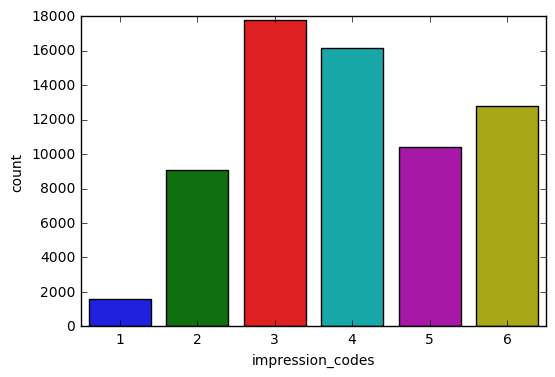

In [42]:
sns.countplot(data=events_new, x='impression_codes')
plt.show()

After looking at this plot, it might seem reasonable that many users interact within the app (corresponding to highest count,3). So, if they view and interact on the book page then will probably like it and will add it to cart and checkout. 

In [43]:
# Let's see which books show most interaction from users
activity_count = pd.DataFrame(events_new.groupby('bookId')['impression_codes'].count())
activity_count.sort_values('impression_codes', ascending=False).head()

,impression_codes
bookId,
0316666343,247
0385504209,170
0312195516,132
0142001740,104
059035342X,95


In [44]:
most_activity_books = pd.DataFrame(['0316666343', '0385504209', '0312195516','0142001740','059035342X'], index=np.arange(5), columns = ['bookISBN'])
pd.merge(most_activity_books, books, on='bookISBN')

,bookISBN,Unnamed: 0,bookName,author,yearOfPublication,publisher,urlId
0,0316666343,408,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",47040.0
1,0385504209,748,The Da Vinci Code,Dan Brown,2003.0,Doubleday,37710.0
2,0312195516,522,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,75190.0
3,0142001740,356,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,44474.0
4,059035342X,2143,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999.0,Arthur A. Levine Books,50722.0


These books as most interacted books makes sense. 

### Building a recommender: Collaborative filtering to generate user-item activity matrix

To avoid memory errors on my machine, I am excluding users who have not shown activity for atleast 20 books. I started with this threshold but the dataset was still large and prediction times were much longer on my machine. So, I decided to choose a small subset by excluding users who have not shown activity for atleast 300 books. 

In [139]:
counts=events_new['user'].value_counts()
events_limited=events_new[events_new['user'].isin(counts[counts >= 300].index)]

In [110]:
events_new.shape

(67834, 4)

In [140]:
events_limited.shape

(2530, 4)

In [142]:
events_limited = events_limited.sort_values('user')

In [143]:
events_limited.head()

,user,bookId,impression,impression_codes
133,16795,0671776126,interact,3
70812,16795,0894718282,interact,3
236001,16795,0451198638,interact,3
235004,16795,0061008869,view,2
234758,16795,0448030926,interact,3


Let's generate a 2D matrix from this table for user and books using impression codes.

In [144]:
activity_matrix=events_limited.pivot(index='user', columns='bookId',values='impression_codes')
print(activity_matrix.shape)


(6, 2469)


In [145]:
activity_matrix.head()

bookId,0004588010,0006531407,0006547486,0006742939,0007102216,0007103352,0007105150,000710698X,002011690X,0020248717,...,1902418204,1902418239,1903116155,1929976011,1930892128,1931402132,2831506751,3822895857,3829029853,5552552660
user,,,,,,,,,,,,,,,,,,,,,
16795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
56399,6.0,NaN,NaN,6.0,6.0,6.0,6.0,6.0,6.0,NaN,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
171118,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0
185233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here NaN values are implying that not all users have shown activity for all books. We can convert NaNs to 0 showing no activity.

In [146]:
activity_matrix.fillna(0, inplace = True)
activity_matrix = activity_matrix.astype(np.int64)

In [147]:
#Let's check now
activity_matrix.head()

bookId,0004588010,0006531407,0006547486,0006742939,0007102216,0007103352,0007105150,000710698X,002011690X,0020248717,...,1902418204,1902418239,1903116155,1929976011,1930892128,1931402132,2831506751,3822895857,3829029853,5552552660
user,,,,,,,,,,,,,,,,,,,,,
16795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
56399,6,0,0,6,6,6,6,6,6,0,...,6,6,0,0,0,0,0,0,6,0
171118,0,0,3,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,5,0,4
185233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
num_users = activity_matrix.shape[0] 
num_books = activity_matrix.shape[1]
print(num_users, num_books)

6 2469


### Training the model

In [149]:
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import correlation, cosine
from math import sqrt

Now let's find k=5 similar users by calculating the cosine similarity between activity vectors. Here correlation coeffients can also be used but cosine similarity gave better RMSE.

In [182]:
def userneighbors(bookid, activity, k):
    cos_similarities=[]
    indices=[]
    activity=activity.T
    loc = activity.index.get_loc(bookid)
    Model_KNN = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    Model_KNN.fit(activity)
    distances, indices = Model_KNN.kneighbors(activity.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    cos_similarities = 1-distances.flatten()
    return cos_similarities,indices

In [184]:
userneighbors('0006742939',activity_matrix,5)

(array([1., 1., 1., 1., 1., 1.]),
 array([[1696, 2253, 1698, 1878, 1697, 2073]]))

The next step is to predict activity for a user and book combination using the nearest neighbors found using the function above.

In [209]:
def predict_activity(userid, bookid, activity, k):
    user_loc = activity.index.get_loc(userid)
    book_loc = activity.columns.get_loc(bookid)
    cos_similarities, indices=userneighbors(bookid, activity,k) 
    sum_wt = np.sum(cos_similarities)-1
    product=1
    pred=0
    wtd_sum=0
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == userid:
            continue;
        else:
            product = activity.iloc[user_loc,indices.flatten()[i]] * (cos_similarities[i])
            wtd_sum = wtd_sum + product                              
    pred = int(round(wtd_sum/sum_wt))
    
    if pred == 0:
        pred = 1  
    elif pred >6:
        pred = 6
    
    #print ('\nPredicted activity for user {0} -> item {1}: {2}'.format(userid,bookid,pred) )     
    
    return pred

In [210]:
predict_activity(16795,'0007102216',activity_matrix,5);

In [190]:
#Make user list from the subset.
userlist=events_limited['user'].tolist()

In [191]:
userlist = sorted(list(set(userlist)))

In [211]:
#Generate prediction matrix and set all non-zero predictions to 0 to start with.
pred_matrix = activity_matrix.copy()
pred_matrix[pred_matrix != 0] = 0

Training matrix (pred_train) is generated and the non-zero activities are computed. These two matrices are compared to compute the performance of the model. The evaluation metric I used here is root mean squared error. 

In [216]:
pred_train = activity_matrix.copy()
pred_train[pred_train != 0] = 0
for i in range(num_users):
    for j in range(num_books):
        userid = userlist[i]
        if (activity_matrix[str(activity_matrix.columns[j])][userid] != 0):
            pred_train.values[i][j] = predict_activity(userid, str(activity_matrix.columns[j]) ,activity_matrix, 5)
            pred_matrix.values[i][j] = predict_activity(userid, str(activity_matrix.columns[j]) ,activity_matrix, 5)
            
        else:
            pred_matrix.values[i][j] = predict_activity(userid, str(activity_matrix.columns[j]) ,activity_matrix, 5)
MSE= mean_squared_error(pred_train,activity_matrix)
RMSE = round(sqrt(MSE),3)
print ("RMSE is: {0}".format(RMSE))


RMSE is: 0.486


In [217]:
activity_matrix

bookId,0004588010,0006531407,0006547486,0006742939,0007102216,0007103352,0007105150,000710698X,002011690X,0020248717,...,1902418204,1902418239,1903116155,1929976011,1930892128,1931402132,2831506751,3822895857,3829029853,5552552660
user,,,,,,,,,,,,,,,,,,,,,
16795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
56399,6,0,0,6,6,6,6,6,6,0,...,6,6,0,0,0,0,0,0,6,0
171118,0,0,3,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,5,0,4
185233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197659,0,4,0,0,0,0,0,0,0,0,...,0,0,5,0,4,4,4,0,0,0


In [218]:
pred_train

bookId,0004588010,0006531407,0006547486,0006742939,0007102216,0007103352,0007105150,000710698X,002011690X,0020248717,...,1902418204,1902418239,1903116155,1929976011,1930892128,1931402132,2831506751,3822895857,3829029853,5552552660
user,,,,,,,,,,,,,,,,,,,,,
16795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
56399,6,0,0,6,6,6,6,6,6,0,...,6,6,0,0,0,0,0,0,6,0
171118,0,0,4,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,4,0,4
185233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197659,0,5,0,0,0,0,0,0,0,0,...,0,0,5,0,5,5,5,0,0,0


In [219]:
pred_matrix

bookId,0004588010,0006531407,0006547486,0006742939,0007102216,0007103352,0007105150,000710698X,002011690X,0020248717,...,1902418204,1902418239,1903116155,1929976011,1930892128,1931402132,2831506751,3822895857,3829029853,5552552660
user,,,,,,,,,,,,,,,,,,,,,
16795,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
35859,1,1,1,1,1,1,1,1,1,1,...,1,1,1,5,1,1,1,1,1,1
56399,6,1,1,6,6,6,6,6,6,1,...,6,6,1,1,1,1,1,1,6,1
171118,1,1,4,1,1,1,1,1,1,4,...,1,1,1,1,1,1,1,4,1,4
185233,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
197659,1,5,1,1,1,1,1,1,1,1,...,1,1,5,1,5,5,5,1,1,1


Once the prediction matrix is generated, we can find out which book a particular user is most likely to purchase next. An example code is shown below. For user 56399, find all books that have activity of 6. If this user had previously had already checked out this book (has activity 6 in the original matrix) then choose the next one which will be the book that the user would most likely purchase next. Here I am listing top 3 books.

In [227]:
userid=56399
count=0
for j in range(num_books):
    if (count<3):
        if (pred_matrix[str(pred_matrix.columns[j])][userid] == 6):
            if (activity_matrix[str(activity_matrix.columns[j])][userid] != 6): 
                book=str(pred_matrix.columns[j])
                count=count+1
                print ('\nUser {0} is most likely to purchase {1} next'.format(userid,book))


User 56399 is most likely to purchase 0060740450 next

User 56399 is most likely to purchase 0099195607 next

User 56399 is most likely to purchase 014013638X next


In [235]:
activity_matrix.to_csv('input.csv')
pred_matrix.to_csv('output.csv')